<a href="https://colab.research.google.com/github/bhumika-singhvee/28june/blob/main/customer_segmentation_sales_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd


In [2]:
from google.colab import files
uploaded = files.upload()


Saving sales_data.csv to sales_data.csv


In [3]:
df = pd.read_csv('sales_data.csv')

In [4]:
df

,Unnamed: 0,ProductID,QuantitySold,Price,Discount,Category,Supplier,Date,CustomerID,Country,Profit
0,0,C,8,75.539471,0.064576,Toys,Supplier1,2022-01-01,1148,USA,20.835021
1,1,A,8,43.100482,0.142251,Toys,Supplier3,2022-01-02,1079,USA,11.003640
2,2,C,3,66.907525,0.198508,Clothing,Supplier2,2022-01-03,1885,Canada,6.896583
3,3,C,1,67.017674,0.071013,Home,Supplier3,2022-01-04,1212,USA,8.221993
4,4,A,8,58.219722,0.127749,Toys,Supplier3,2022-01-05,1202,UK,8.201146
...,...,...,...,...,...,...,...,...,...,...,...
95,95,A,7,25.254347,0.060585,Toys,Supplier2,2022-04-06,1216,Canada,26.637678
96,96,A,4,60.112114,0.146363,Toys,Supplier1,2022-04-07,1853,USA,25.426802
97,97,C,7,94.253930,0.053977,Electronics,Supplier1,2022-04-08,1826,Canada,11.447571
98,98,A,8,72.642682,0.137866,Electronics,Supplier1,2022-04-09,1794,USA,9.272190


In [5]:
# Example: Remove rows with missing values
df = df.dropna()


In [9]:

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [10]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['QuantitySold', 'Price', 'Discount', 'Profit']])


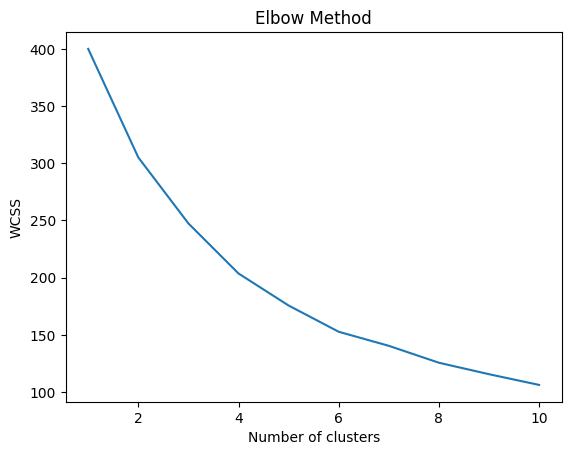

In [11]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)
# Plot the Elbow method
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within-Cluster Sum of Squares
plt.show()


In [12]:
k = 3  # Choose the optimal number of clusters
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
df['Cluster'] = kmeans.fit_predict(scaled_data)


In [13]:
cluster_analysis = df.groupby('Cluster').mean()
print(cluster_analysis)


         Unnamed: 0  QuantitySold      Price  Discount   CustomerID  \
Cluster                                                               
0         42.157895      4.526316  52.699918  0.153806  1449.657895   
1         52.107143      5.428571  35.062923  0.125986  1563.857143   
2         55.558824      4.882353  78.663081  0.085298  1505.029412   

            Profit  TotalSpending  
Cluster                            
0        10.717538     214.826040  
1        23.573453     187.491239  
2        13.640265     370.119830  


<ipython-input-13-034b536f6107>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_analysis = df.groupby('Cluster').mean()


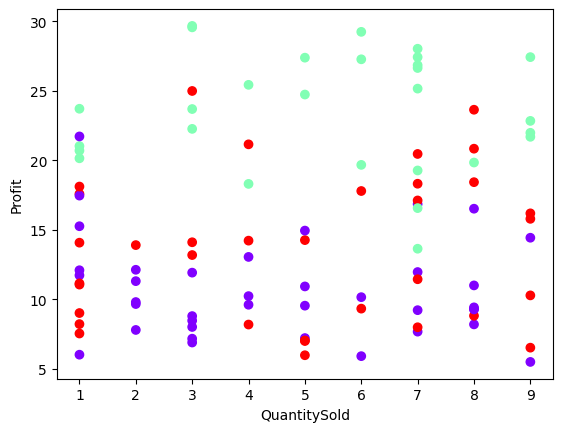

In [14]:
plt.scatter(df['QuantitySold'], df['Profit'], c=df['Cluster'], cmap='rainbow')
plt.xlabel('QuantitySold')
plt.ylabel('Profit')
plt.show()


In [15]:
# Assuming 'QuantitySold' and 'Profit' are the relevant columns in your DataFrame

# Calculate average purchase quantity and total spending for each segment
segment_stats = df.groupby('Cluster').agg({
    'QuantitySold': 'mean',  # Average purchase quantity
    'Profit': 'sum'  # Total spending
}).reset_index()

# Rename the columns for clarity
segment_stats = segment_stats.rename(columns={
    'QuantitySold': 'AvgPurchaseQuantity',
    'Profit': 'TotalSpending'
})

# Display the calculated statistics for each segment
print(segment_stats)


   Cluster  AvgPurchaseQuantity  TotalSpending
0        0             4.526316     407.266452
1        1             5.428571     660.056685
2        2             4.882353     463.769005


In [16]:
# Assuming 'Category' is the column representing product categories

# Calculate the most frequent product category for each segment
preferred_category = df.groupby('Cluster')['Category'].agg(lambda x: x.value_counts().idxmax()).reset_index()

# Rename the columns for clarity
preferred_category = preferred_category.rename(columns={'Category': 'PreferredCategory'})

# Display the preferred product category for each segment
print(preferred_category)


   Cluster PreferredCategory
0        0       Electronics
1        1       Electronics
2        2       Electronics
